### Wavefile Read/Write
Open and read a wavefile, then write contents to output file
This is a proof of concept for reading/writing wave files, and will likely form the outer shell of the code later

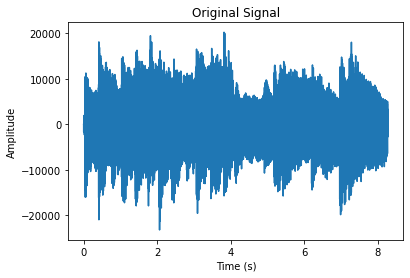

In [1]:
import wave
import numpy as np
import matplotlib.pyplot as plt

input_file_path = './electric_guitar_sample.wav'

def load_audio(file_path):
    audio_data = wave.open(file_path, 'r')
    return audio_data

def convert_to_numpy_array(signal):
    frame_count = signal.getnframes()
    audio_frames = signal.readframes(frame_count)
    audio_frames = np.frombuffer(audio_frames, dtype = np.int16)
    return audio_frames

def write_to_wav_file(file_path, audio_frames, channel_count, sample_width, sample_rate):
    with wave.open(file_path, 'w') as output_file:
        output_file.setnchannels(channel_count)
        output_file.setsampwidth(sample_width)
        output_file.setframerate(sample_rate)
        output_file.writeframes(audio_frames)

def plot_audio_data(array, signal_framerate, title):
    time = np.linspace(0, len(array) / signal_framerate, num = len(array))
    
    plt.figure()
    plt.plot(time, array)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title(title)
    plt.show()

audio_data = load_audio(input_file_path)
audio_frames = convert_to_numpy_array(audio_data)

channel_count = audio_data.getnchannels()
sample_width = audio_data.getsampwidth()
sample_rate = 44100
frame_rate = audio_data.getframerate() * 2

plot_audio_data(audio_frames, frame_rate, 'Original Signal')

output_file_path = './outputs/unaltered_output.wav'
write_to_wav_file(output_file_path, audio_frames, channel_count, sample_width, sample_rate)

#### Filters

33   5.65326


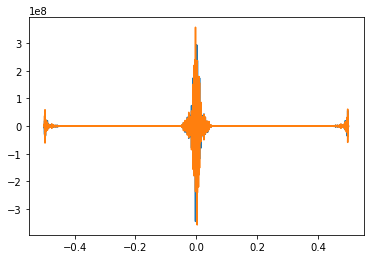

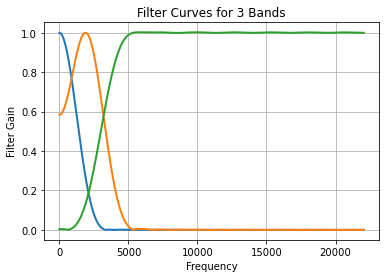

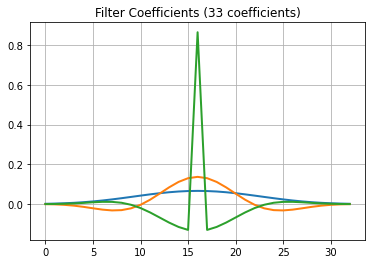

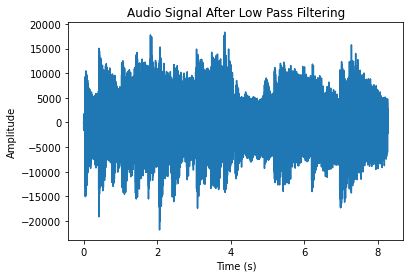

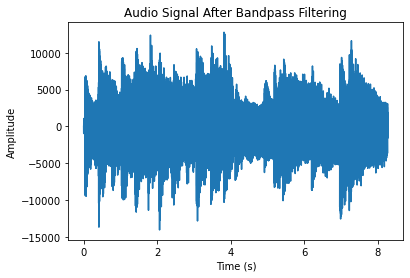

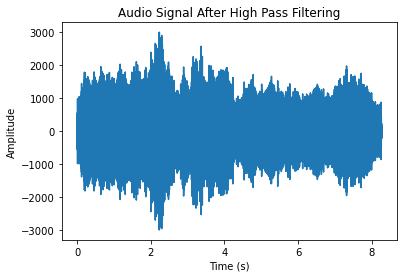

In [15]:
# 3 band equalizer:
# bass: 1Hz - 800Hz
# mid: 800Hz - 3000Hz
# treble: 3000Hz - 8000Hz

from numpy import pi, absolute
from scipy.signal import kaiserord, lfilter, firwin, freqz
from pylab import figure, plot, title, grid, xlabel, ylabel
from scipy.io import wavfile
import os

# Create a FIR filter and apply it to x

nyquist_rate = sample_rate / 2.0
transition_width = 5000 / nyquist_rate

stop_band_attenuation_dB = 60
low_transition_freq = 800
high_transition_freq = 3000

FIR_order, beta = kaiserord(stop_band_attenuation_dB, transition_width)

print(FIR_order, " ", beta)

lowpass_filter = firwin(FIR_order, low_transition_freq, window=('kaiser', beta), fs = sample_rate)
bandpass_filter = firwin(FIR_order, [low_transition_freq / nyquist_rate, high_transition_freq / nyquist_rate], pass_zero=False)
highpass_filter = firwin(FIR_order, high_transition_freq / nyquist_rate, pass_zero=False)

with open('filter_coefs.coe', 'w') as file:
    file.write("memory_initialization_radix = 10;")
    file.write("memory_initialization_vector = ")
    for value in lowpass_filter:
        file.write(str(value) + ", ")
    for value in bandpass_filter:
        file.write(str(value) + ", ")
    for value in highpass_filter:
        file.write(str(value) + ", ")
    file.write(";")
file.close()

low_freq_signal = lfilter(lowpass_filter, 1.0, audio_frames)
mid_freq_signal = lfilter(bandpass_filter, 1.0, audio_frames)
high_freq_signal = lfilter(highpass_filter, 1.0, audio_frames)

fft_audio = np.fft.fft(audio_frames)

import matplotlib.pyplot as plt

t = np.arange(729932)
sp = np.fft.fft(audio_frames)
freq = np.fft.fftfreq(t.shape[-1])
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

figure()
w, h = freqz(lowpass_filter, worN=8000)
plot((w/pi)*nyquist_rate, absolute(h), linewidth=2)
w, h = freqz(bandpass_filter, worN=8000)
plot((w/pi)*nyquist_rate, absolute(h), linewidth=2)
w, h = freqz(highpass_filter, worN=8000)
plot((w/pi)*nyquist_rate, absolute(h), linewidth=2)
title('Filter Curves for 3 Bands')
xlabel("Frequency")
ylabel("Filter Gain")
grid(True)

figure()
plot(lowpass_filter, linewidth=2)
plot(bandpass_filter, linewidth=2)
plot(highpass_filter, linewidth=2)
title('Filter Coefficients (%d coefficients)' % FIR_order)
grid(True)

plot_audio_data(low_freq_signal, frame_rate, 'Audio Signal After Low Pass Filtering')
plot_audio_data(mid_freq_signal, frame_rate, 'Audio Signal After Bandpass Filtering')
plot_audio_data(high_freq_signal, frame_rate, 'Audio Signal After High Pass Filtering')

low_freq_signal = low_freq_signal.astype(np.int16)
mid_freq_signal = mid_freq_signal.astype(np.int16)
high_freq_signal = high_freq_signal.astype(np.int16)

wavfile.write('outputs/lowfreq.wav', frame_rate, low_freq_signal)
wavfile.write('outputs/midfreq.wav', frame_rate, mid_freq_signal)
wavfile.write('outputs/highfreq.wav', frame_rate, high_freq_signal)
wavfile.write('outputs/original.wav', frame_rate, audio_frames)

### Test Signal

In [ ]:
from numpy import cos, sin, pi, arange

sample_rate = 20000
nsamples = 400
t = arange(nsamples) / sample_rate
x = cos(2*pi*40*t) + 0.2*sin(2*pi*500*t+0.1) + \
        0.2*sin(2*pi*1500*t) + 0.1*sin(2*pi*5000*t + 0.1) + \
            0.1*sin(2*pi*10000*t+.8)

#### FFT Implementation for Audio Signal

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import wave

def open_plot_file():

    file_path = './electric_guitar_sample.wav'

    audio_data = wave.open(file_path, 'r')

    audio_signal = audio_data.readframes(-1)
    audio_signal = np.frombuffer(audio_signal, dtype='int16')
    
    print(audio_signal)

    plt.figure(1)
    plt.plot(audio_signal)

    audio_fft = np.fft.fft(audio_signal)
    audio_freq = np.fft.fftfreq(len(audio_signal))
    
    print(audio_fft)
    
    plt.figure(2)
    plt.plot(audio_fft)
    
    Y    = np.fft.fft(audio_signal)
    freq = np.fft.fftfreq(len(audio_signal))

    plt.figure()
    plt.plot( freq, np.abs(Y) )
    plt.figure()
    plt.plot(freq, np.angle(Y) )
    plt.show()

open_plot_file()

#### Other Method to Plot FFT of Signal

In [ ]:
import numpy as np
import wave
import matplotlib.pyplot as plt
import os

def perform_fft(signal, sample_rate):
    # perform the FFT
    fft = np.fft.fft(signal)
    # calculate the frequency bins
    frequency_bins = np.fft.fftfreq(len(signal), 1 / sample_rate)
    return fft, frequency_bins

files = ['electric_guitar_sample.wav']
files_set = set(files)
#create subplots
fig, files_set = plt.subplots(len(files))

# Open wave file
# iterate through files in audio_samples
for i, file  in enumerate(files):
    wav_file = wave.open('./' + file, 'r')

    # Extract Raw Audio from Wav File
    signal = wav_file.readframes(-1)
    frame_rate = wav_file.getframerate()
    signal = np.frombuffer(signal, dtype='int16')

    fft_out, frequency_bins = perform_fft(signal, frame_rate)

    #plot the fft
    plt.plot(frequency_bins, fft_out)

    plt.xlabel('Frequency')
    plt.ylabel('Amplitude')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, hspace=0.5, wspace=0.5)
#show all the plots
plt.show()

print(len(audio_frames))

print(len(test))
print(len(fft_out), " ", len(frequency_bins))

# for bin in range(len(frequency_bins)):
#     print(frequency_bins[bin])

In [ ]:
from scipy.fft import fft, ifft
import numpy as np

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)

print(y)

yinv = ifft(y)
print(yinv)

low_freq_signal = lfilter(lowpass_filter, 1.0, x)

print(low_freq_signal)

In [ ]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

for i in range(len(yf)):
    print(xf[i], " ", yf[i])